In [1]:
import os
import nbformat
import pandas as pd
from termcolor import colored

import sys
sys.path.append("../..")
from utils.misc import *
from utils.visualizer_misc import *

import warnings
warnings.filterwarnings("ignore")

In [2]:
save = True # Save results.

In [3]:
# Usage
seed_values = [0, 1, 2, 3, 4]

n_used_values = [0, 100, 200]
# Process folder without n_used
df_a_Vanilla_NO = process_notebooks_in_folder('results/a_Vanilla-NO', seed_values, n_used_values)
df_a_Vanilla_NO['Method'] = 'PI-Vanilla-NO'
print(colored("\nDataFrame of a_Vanilla-NO:", 'red'))
print(df_a_Vanilla_NO)
print(colored('#'*230, 'green'))

n_used_values = [0, 100, 200]
# Process folder with n_used
df_b_Latent_NO = process_notebooks_in_folder('results/b_Latent-NO', seed_values, n_used_values)
df_b_Latent_NO['Method'] = 'PI-Latent-NO'
print(colored("DataFrame of b_Latent-NO:", 'red'))
print(df_b_Latent_NO)
print(colored('#'*230, 'green'))

# n_used_values = [200]
# # Process folder with n_used
# df_c_Latent_NO_with_AE = process_notebooks_in_folder('results/c_Latent-NO_with-AE', seed_values, n_used_values)
# df_c_Latent_NO_with_AE['Method'] = 'Latent-NO (with-Pretrained-AE)'
# print(colored("DataFrame of c_Latent-NO_with-AE:", 'red'))
# print(df_c_Latent_NO_with_AE)
# print(colored('#'*230, 'green'))


DataFrame of a_Vanilla-NO:
    seed  n_used  Mean Squared Error Test  R2 score Test  Rel. L2 Error Test  \
0      0       0                 0.000002       0.999986            0.002842   
1      1       0                 0.000002       0.999984            0.003063   
2      2       0                 0.000034       0.999505            0.014985   
3      3       0                 0.000010       0.999915            0.006696   
4      4       0                 0.000002       0.999983            0.003066   
5      0     100                 0.000039       0.999643            0.013924   
6      1     100                 0.000004       0.999961            0.004644   
7      2     100                 0.000002       0.999980            0.003268   
8      3     100                 0.000003       0.999982            0.003210   
9      4     100                 0.000005       0.999950            0.005195   
10     0     200                 0.000001       0.999989            0.002506   
11     1    

In [4]:
# Combine the dataframes into one
df_combined = pd.concat([df_a_Vanilla_NO, df_b_Latent_NO], ignore_index=True)

# Display the combined DataFrame
print("\nCombined DataFrame:")
print(df_combined)


Combined DataFrame:
    seed  n_used  Mean Squared Error Test  R2 score Test  Rel. L2 Error Test  \
0      0       0                 0.000002       0.999986            0.002842   
1      1       0                 0.000002       0.999984            0.003063   
2      2       0                 0.000034       0.999505            0.014985   
3      3       0                 0.000010       0.999915            0.006696   
4      4       0                 0.000002       0.999983            0.003066   
5      0     100                 0.000039       0.999643            0.013924   
6      1     100                 0.000004       0.999961            0.004644   
7      2     100                 0.000002       0.999980            0.003268   
8      3     100                 0.000003       0.999982            0.003210   
9      4     100                 0.000005       0.999950            0.005195   
10     0     200                 0.000001       0.999989            0.002506   
11     1     200   

In [5]:
group_labels = [
    (0, 0, "Pure Physics"),               # First box
    (1, 2, "Physics + Data"),             # Boxes 2 to 3
]

In [6]:
# Define the order of categories for the x-axis
category_order = [0, 100, 200]

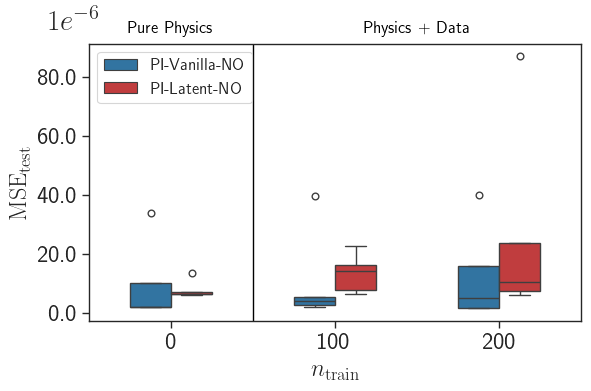

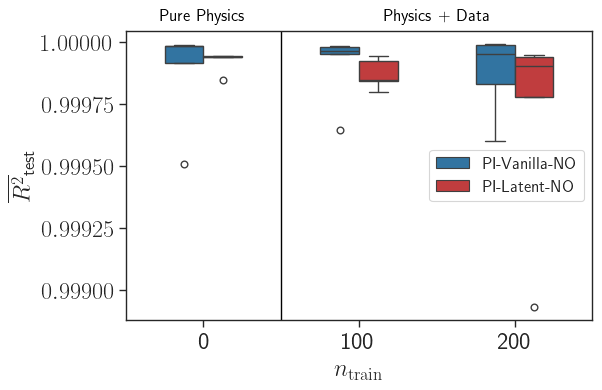

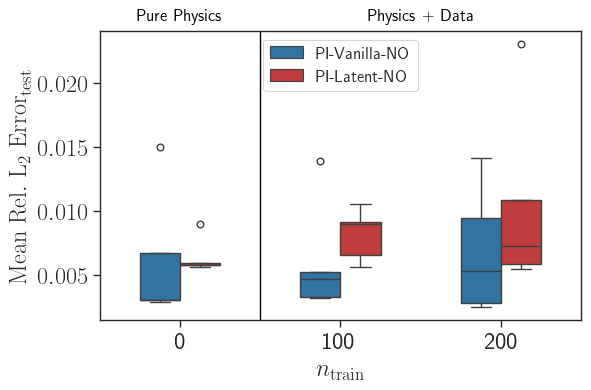

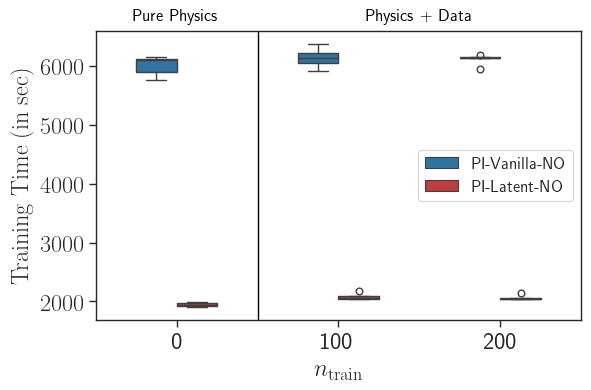

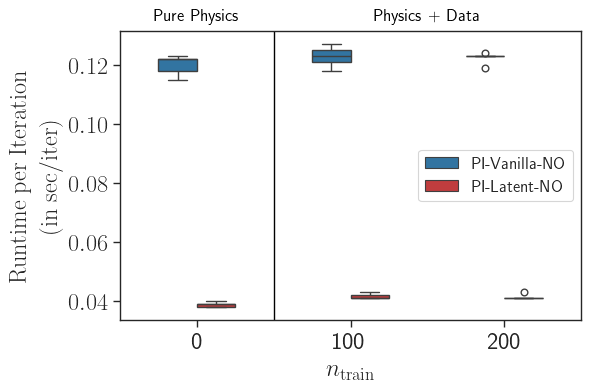

In [7]:
# Box plot of MSE test
plot_box(
    df_combined, 
    x_col='n_used', 
    y_col='Mean Squared Error Test', 
    hue_col='Method', 
    xlabel=r'$n_{\mathrm{train}}$', 
    ylabel=r'${\mathrm{MSE}_{\mathrm{test}}}$',  # Added spaces with "\;"
    title= None, #r'${\mathrm{MSE} \; {\mathrm{test}}}$',  # Added spaces with "\;"
    save=save, 
    save_path=os.path.join(os.getcwd(), 'results', 'plots'), 
    filename='MSE_test_box.pdf',
    custom_format=True, 
    annotate=True, 
    notation='1e^{-6}', 
    scale=1e-6,
    group_labels=group_labels,
    category_order=category_order,
    figsize=(6, 4)
) # figsize=(10, 6)

# Box plot of R2 score test
plot_box(
    df_combined, 
    x_col='n_used', 
    y_col='R2 score Test', 
    hue_col='Method', 
    xlabel=r'$n_{\mathrm{train}}$', 
    ylabel=r'$\overline{R^2}_{\text{test}}$',  # Added spaces with "\;"
    title=None,  
    save=save, 
    save_path=os.path.join(os.getcwd(), 'results', 'plots'), 
    filename='R2score_test_box.pdf',
    custom_format=False, 
    annotate=False, 
    notation=None, 
    scale=None,
    group_labels=group_labels,
    category_order=category_order,
    figsize=(6, 4)
)

# Box plot of Rel. L2 Error Test
plot_box(
    df_combined, 
    x_col='n_used', 
    y_col='Rel. L2 Error Test', 
    hue_col='Method', 
    xlabel=r'$n_{\mathrm{train}}$', 
    ylabel=r'${\mathrm{Mean \ Rel. \; L_2 \; Error}_{\mathrm{test}}}$',  # Added spaces with "\;"
    title=None,  
    save=save, 
    save_path=os.path.join(os.getcwd(), 'results', 'plots'), 
    filename='RelL2error_test_box.pdf',
    custom_format=False, 
    annotate=False, 
    notation=None, 
    scale=None,
    group_labels=group_labels,
    category_order=category_order,
    figsize=(6, 4)
)

# Box plot of Training-time
plot_box(
    df_combined, 
    x_col='n_used', 
    y_col='Training Time (in sec)', 
    hue_col='Method', 
    xlabel=r'$n_{\mathrm{train}}$', 
    ylabel=r'${\mathrm{Training \; Time \; (in \; sec)}}$',  # Added spaces with "\;"
    title=None, #r'${\mathrm{Training \; Time \; (in \; sec)}}$',  # Added spaces with "\;"
    save=save, 
    save_path=os.path.join(os.getcwd(), 'results', 'plots'), 
    filename='Trainingtime_box.pdf',
    custom_format=False, 
    annotate=False, 
    notation=None, 
    scale=None,
    group_labels=group_labels,
    category_order=category_order,
    figsize=(6, 4)
)


# Box plot of Runtime-per-Iteration
plot_box(
    df_combined, 
    x_col='n_used', 
    y_col='Runtime per Iteration (in sec/iter)', 
    hue_col='Method', 
    xlabel=r'$n_{\mathrm{train}}$', 
    ylabel=r'$\begin{array}{c}\mathrm{Runtime \; per \; Iteration} \\ \mathrm{(in \; sec/iter)}\end{array}$',  # Added spaces with "\;"
    title=None, #r'${\mathrm{Runtime \; per \; Iteration \; (in \; sec/iter)}}$',  # Added spaces with "\;"
    save=save, 
    save_path=os.path.join(os.getcwd(), 'results', 'plots'), 
    filename='RuntimePerIteration_box.pdf',
    custom_format=False, 
    annotate=False, 
    notation=None, 
    scale=None,
    group_labels=group_labels,
    category_order=category_order,
    figsize=(6, 4)
)

In [8]:
# Define the columns and scaling factors
target_cols = ['Mean Squared Error Test', 'Rel. L2 Error Test', 'R2 score Test',
    'Training Time (in sec)', 'Runtime per Iteration (in sec/iter)']
scale_factors = {'Mean Squared Error Test': 1e-5, 'Rel. L2 Error Test': 1, 'R2 score Test': 1,
                 'Training Time (in sec)': 1, 'Runtime per Iteration (in sec/iter)':1}
format_spec = {
    'Mean Squared Error Test': '.1e',
    'Rel. L2 Error Test': '.3f',
    'R2 score Test': '.4f',
    'Training Time (in sec)': '.0f',
    'Runtime per Iteration (in sec/iter)': '.3f'
}

rename_dict = {
    'n_used': 'n_train', # Rename 'n_used' to 'n_train'
    'Method': 'Model',  # Rename 'Method' to 'Model'
    'Mean Squared Error Test': 'Mean Squared Error Test',
    'Training Time (in sec)': 'Training Time (in sec)'
}

# Generate the formatted DataFrame with the updated column name
df_scientific_formatted = calculate_mean_std_scientific(
    df_combined, 
    group_cols=['n_used', 'Method'],  # Use 'n_used' initially
    target_cols=target_cols, 
    scale_factors=scale_factors, 
    format_spec = format_spec,
    rename_dict=rename_dict
)

# Reorder the DataFrame so that 'Vanilla-NO' comes first, then 'Latent-NO', alternating by 'n_train'
df_scientific_formatted['sort_order'] = df_scientific_formatted.groupby('n_train')['Model'].transform(
    lambda x: ['Vanilla-NO' if i % 2 == 0 else 'Latent-NO' for i in range(len(x))]
)
# Now we sort by this new `sort_order` column to get the alternating order
df_scientific_formatted = df_scientific_formatted.sort_values(by=['n_train', 'sort_order']).drop(columns=['sort_order'])

# Reorder columns to make 'Model' first and 'n_train' second
df_scientific_formatted = df_scientific_formatted[['Model', 'n_train', 'Mean Squared Error Test', 'Rel. L2 Error Test', 'R2 score Test', 'Training Time (in sec)',  'Runtime per Iteration (in sec/iter)']]
display(df_scientific_formatted)


# Generate LaTeX table from the formatted DataFrame
latex_table = generate_latex_table(df_scientific_formatted)
# Display the LaTeX table string
print("\nLaTeX Table:")
print(latex_table)

,Model,n_train,Mean Squared Error Test,Rel. L2 Error Test,R2 score Test,Training Time (in sec),Runtime per Iteration (in sec/iter)
1,PI-Vanilla-NO,0,9.9e-06 ± 1.4e-05,0.006 ± 0.005,0.9999 ± 0.0002,6009 ± 169,0.120 ± 0.003
0,PI-Latent-NO,0,7.8e-06 ± 3.2e-06,0.006 ± 0.001,0.9999 ± 0.0000,1945 ± 37,0.039 ± 0.001
3,PI-Vanilla-NO,100,1.1e-05 ± 1.6e-05,0.006 ± 0.004,0.9999 ± 0.0001,6142 ± 173,0.123 ± 0.003
2,PI-Latent-NO,100,1.3e-05 ± 6.6e-06,0.008 ± 0.002,0.9999 ± 0.0001,2080 ± 55,0.042 ± 0.001
5,PI-Vanilla-NO,200,1.3e-05 ± 1.6e-05,0.007 ± 0.005,0.9999 ± 0.0002,6111 ± 92,0.122 ± 0.002
4,PI-Latent-NO,200,2.7e-05 ± 3.4e-05,0.010 ± 0.007,0.9997 ± 0.0004,2063 ± 46,0.041 ± 0.001



LaTeX Table:
\begin{tabular}{rlll}
\hline
   $\mathrm{Model}$ & $\mathrm{n}_{\mathrm{train}}$ & $\mathrm{R^2\ Score\ Test}$ & $\mathrm{Rel.\ L2\ Error\ Test}$ & $\mathrm{Training\ Time\ (in\ sec)}$ & $\mathrm{Runtime\ per\ Iteration\ (in\ sec/iter)}$ \\
\hline
 PI-Vanilla-NO &0 & 0.9999 ± 0.0002 & 0.006 ± 0.005 & 6009 ± 169 & 0.120 ± 0.003 \\ 
 PI-Latent-NO &0 & 0.9999 ± 0.0000 & 0.006 ± 0.001 & 1945 ± 37 & 0.039 ± 0.001 \\ 
 PI-Vanilla-NO &100 & 0.9999 ± 0.0001 & 0.006 ± 0.004 & 6142 ± 173 & 0.123 ± 0.003 \\ 
 PI-Latent-NO &100 & 0.9999 ± 0.0001 & 0.008 ± 0.002 & 2080 ± 55 & 0.042 ± 0.001 \\ 
 PI-Vanilla-NO &200 & 0.9999 ± 0.0002 & 0.007 ± 0.005 & 6111 ± 92 & 0.122 ± 0.002 \\ 
 PI-Latent-NO &200 & 0.9997 ± 0.0004 & 0.010 ± 0.007 & 2063 ± 46 & 0.041 ± 0.001 \\ 
\hline
\end{tabular}
